***Credit Risk Analysis Using Classification Technique***

Overview
A short primer of underwriting in the credit industry - In general, whenever an individual/corporation applies for a loan from a bank (or any loan issuer), their credit history undergoes a rigorous check to ensure that whether they are capable enough to pay off the loan (in this industry it is referred to as credit-worthiness).

The issuers have a set of model/s and rule/s in place which take information regarding their current financial standing, previous credit history and some other variables as input and output a metric which gives a measure of the risk that the issuer will potentially take on issuing the loan. The measure is generally in the form of a probability and is the risk that the person will default on their loan (called the probability of default) in the future.

Based on the amount of risk that the issuer is willing to take (plus some other factors) they decide on a cutoff of that score and use it to take a decision regarding whether to pass the loan or not. This is a way of managing credit risk. The whole process collectively is referred to as underwriting.

Overview of the problem In this project you will have to put yourself in the shoes of a loan issuer and manage credit risk by using the past data and deciding whom to give the loan to in the future. The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.

Content
Import packages
Load data
Data preparation
3.1 - Statistical Summary
Missing Data Analysis
Missing Data Treatment
5.1 - Handling Missing Values in Numerical Columns
5.2 - Handling Missing Values in Categorical Columns
Exploratory Data Analysis
7.1 - Correlation
7.2 - Correlation Plot
Modeling
8.1 - Preparation of datasets

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Import Packages***

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

***Load Data***

In [0]:
data = pd.read_csv('/content/drive/My Drive/Data /XYZCorp_LendingData.csv',sep = "\t")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


***Data Description***

In [0]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("display.width",None)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

In [0]:
print(data.describe())

                 id     member_id      loan_amnt    funded_amnt  \
count  8.559690e+05  8.559690e+05  855969.000000  855969.000000   
mean   3.224073e+07  3.476269e+07   14745.571335   14732.378305   
std    2.271969e+07  2.399418e+07    8425.340005    8419.471653   
min    5.473400e+04  7.069900e+04     500.000000     500.000000   
25%    9.067986e+06  1.079273e+07    8000.000000    8000.000000   
50%    3.431355e+07  3.697532e+07   13000.000000   13000.000000   
75%    5.446311e+07  5.803559e+07   20000.000000   20000.000000   
max    6.861687e+07  7.351969e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    855969.000000  855969.000000  855969.000000  8.559690e+05   
mean      14700.061226      13.192320     436.238072  7.507119e+04   
std        8425.805478       4.368365     243.726876  6.426447e+04   
min           0.000000       5.320000      15.690000  0.000000e+00   
25%        8000.000000       9.990000     260.

In [0]:
print(data.describe(include='object'))

              term   grade sub_grade emp_title emp_length home_ownership  \
count       855969  855969    855969    806526     812908         855969   
unique           2       7        35    290912         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        600221  247998     54958     12965     282090         429106   

       verification_status   issue_d pymnt_plan    desc             purpose  \
count               855969    855969     855969  121812              855969   
unique                   3       103          2  120335                  14   
top        Source Verified  Oct-2015          n          debt_consolidation   
freq                318178     48212     855964     231              505392   

                     title zip_code addr_state earliest_cr_line  \
count               855936   855969     855969           855969   
unique               60991      931         51              697   
top     Debt consolida

***Checking Null Values in Percentage***

In [0]:
data.isnull().sum()/855969*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.776261
emp_length                      5.030673
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_d                         0.000000
pymnt_plan                      0.000000
desc                           85.769111
purpose                         0.000000
title                           0.003855
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_cr_line

In [0]:
data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

***Deleting Columns Having More Than 75% Null Values***

In [0]:
for i in data.columns.values:
    missing_val=data[i].isnull().sum()/855969*100
    if missing_val > 75:
        data = data.drop(i,axis=1)

In [0]:
data.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             33
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq        439812
open_acc                           0
p

***Deleting Null Values less than 2% ***

In [0]:
for i in data.columns.values:
    missing_val=data[i].isnull().sum()/855969*100
    if missing_val < 2:
        data = data.dropna(subset=[i])

In [0]:
data.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      48818
emp_length                     42463
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq        435283
open_acc                           0
p

***Converting Default_ind Column to Categorical Column***

In [0]:
# converting default_ind into categorical type
data.default_ind = data['default_ind'].astype('str')
#Term column is treated as object at it contains "month" string...so removing the "month" and making it numeric
data["term"]=data['term'].str.split(' ').str[1]

data.term = data.term.astype("int64")

***Converting Date-Time Format***

In [0]:
data['earliest_cr_line']=data['earliest_cr_line'].astype('datetime64[ns]')
data['last_pymnt_d']=data['last_pymnt_d'].astype('datetime64[ns]')
data['next_pymnt_d']=data['next_pymnt_d'].astype('datetime64[ns]')
data['last_credit_pull_d']=data['last_credit_pull_d'].astype('datetime64[ns]')
data['issue_d']=data['issue_d'].astype('datetime64[ns]')

Bifurcating Columns Into Date,Numeric and Category 

In [0]:
data_date=data.select_dtypes(include='datetime64[ns]')
data_date.isnull().sum()

issue_d                    0
earliest_cr_line           0
last_pymnt_d               0
next_pymnt_d          252161
last_credit_pull_d         0
dtype: int64

In [0]:
from datetime import timedelta, date
next_pmt = data_date.last_pymnt_d + timedelta(30)
data_date.next_pymnt_d = data_date.next_pymnt_d.fillna(next_pmt)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
new_date_var1=data_date.last_credit_pull_d - data_date.issue_d
new_date_var2=data_date.last_credit_pull_d - data_date.last_pymnt_d 
date_feat=pd.DataFrame({'new_var1':new_date_var1,'new_var2':new_date_var2,'target':data.default_ind})
date_feat.new_var1=date_feat.new_var1.astype('str')
date_feat.new_var2=date_feat.new_var2.astype('str')
date_feat['new_var1'] =date_feat.new_var1.str.split(' ').str[0]
date_feat.new_var1 = date_feat.new_var1.astype('int64')
date_feat['new_var2']=date_feat['new_var2'].str.split(' ').str[0]
date_feat.new_var2 = date_feat.new_var2.astype('int64')
date_feat.head()
date_feat = date_feat.drop(['target'],axis=1)

In [0]:
data_cat=data.select_dtypes(include='object')
data_cat.isnull().sum()

grade                      0
sub_grade                  0
emp_title              48818
emp_length             42463
home_ownership             0
verification_status        0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
initial_list_status        0
application_type           0
default_ind                0
dtype: int64

In [0]:
data_num=data.select_dtypes(include=['int64','float64'])
data_num.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
annual_inc                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq        435283
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         0
total_acc                          0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
l

In [0]:
from datetime import timedelta, date
#Considering next_pymnt_d to be the date after 30 days of last_pymnt_d
next_pmt = data_date.last_pymnt_d + timedelta(30)
data_date.next_pymnt_d = data_date.next_pymnt_d.fillna(next_pmt)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
data_cat.nunique()

grade                       7
sub_grade                  35
emp_title              288749
emp_length                 11
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   60833
zip_code                  930
addr_state                 51
initial_list_status         2
application_type            2
default_ind                 2
dtype: int64

***Checking Unique Values In Variables***

In [0]:
#checking unique values in variables

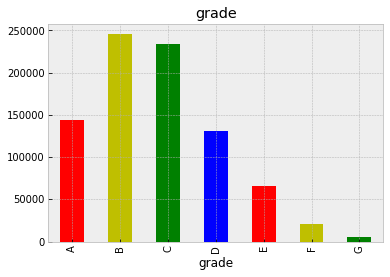

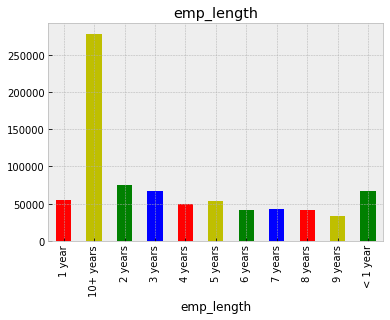

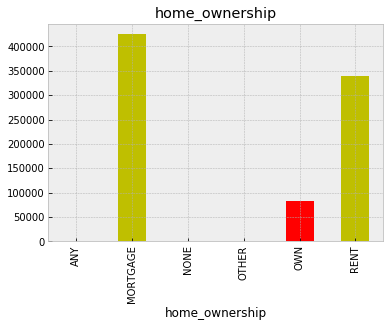

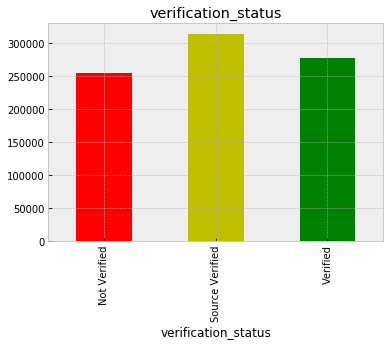

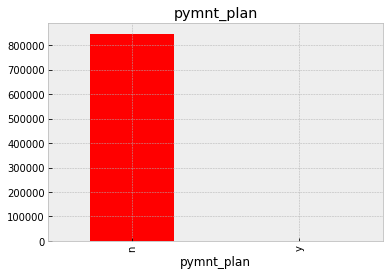

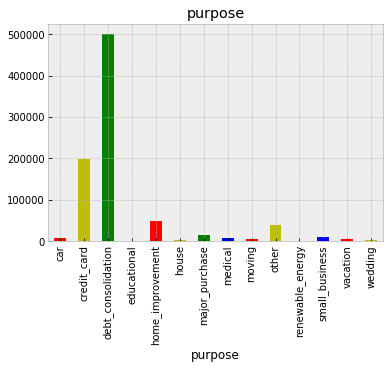

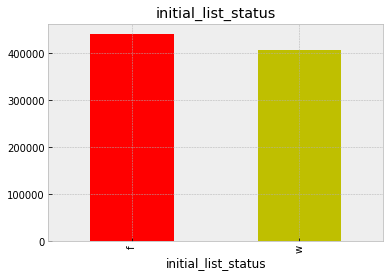

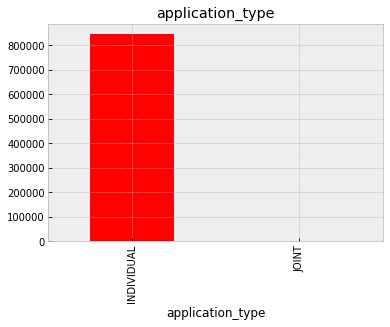

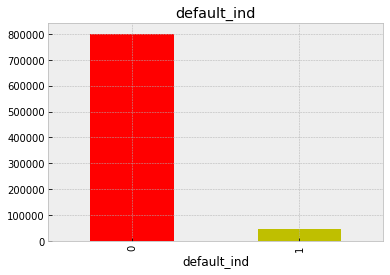

In [0]:
for var in data_cat:
    if len(data_cat[var].unique()) <= 20:
        data_cat.groupby(var)[var].count().plot.bar(color=['r','y','g','b'])
        plt.title(var)
        plt.show()

***Dropping Unique Categorical Columns***

In [0]:
data_cat=data_cat.drop(['addr_state','sub_grade','emp_title','title','pymnt_plan','application_type','zip_code'],axis=1)

***Taking 20 Unique Values In Numerical Variable***

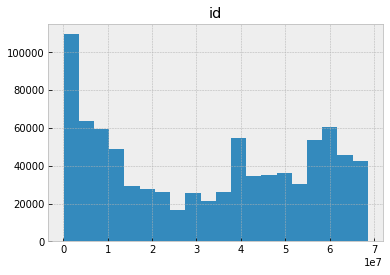

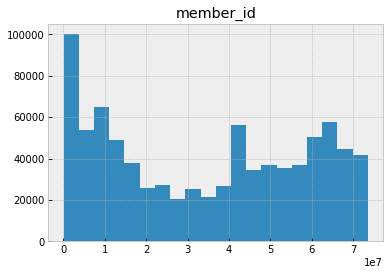

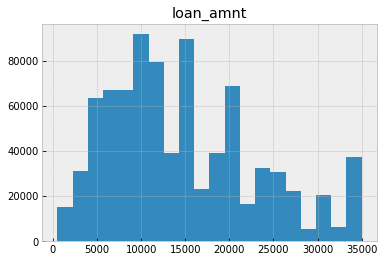

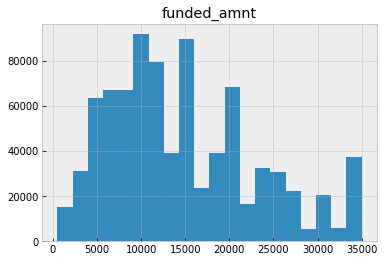

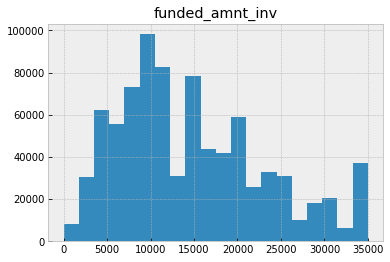

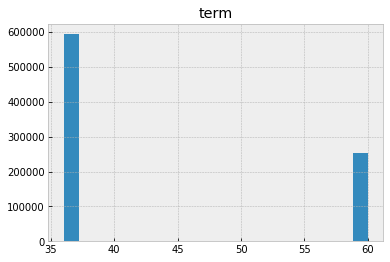

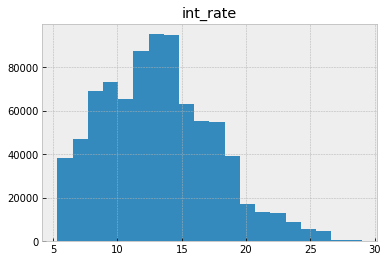

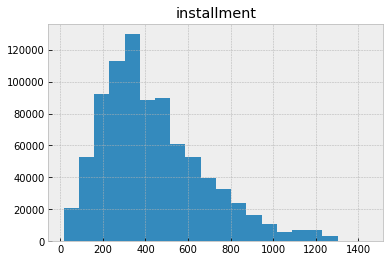

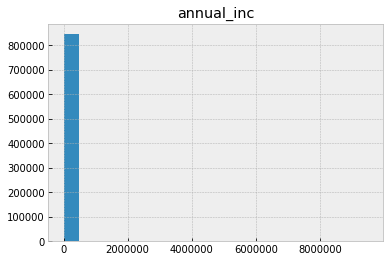

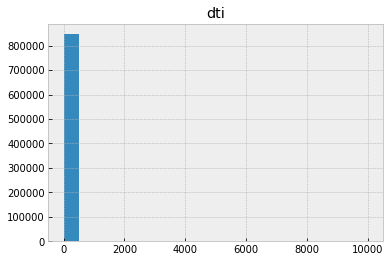

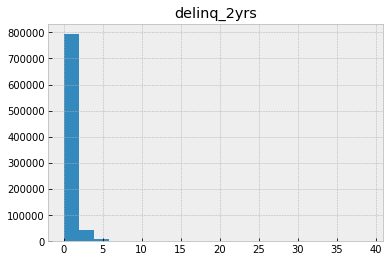

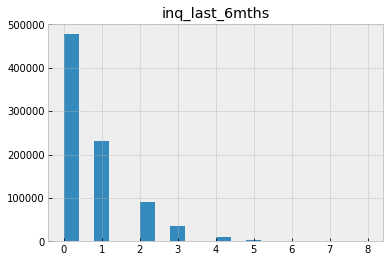

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


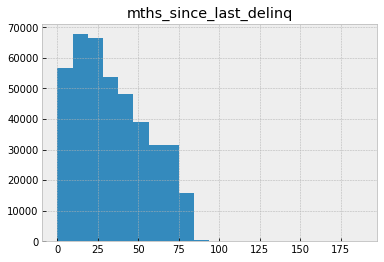

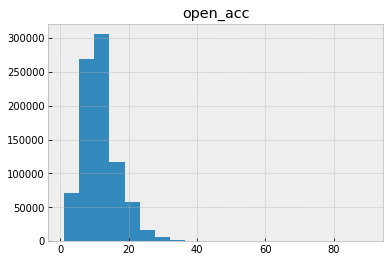

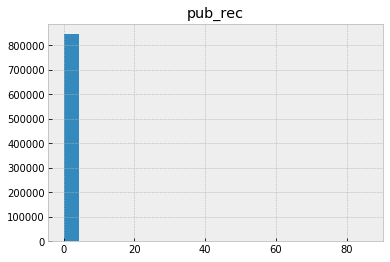

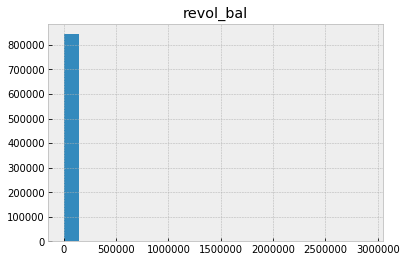

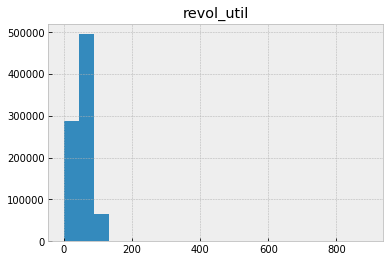

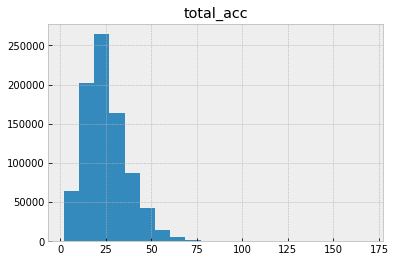

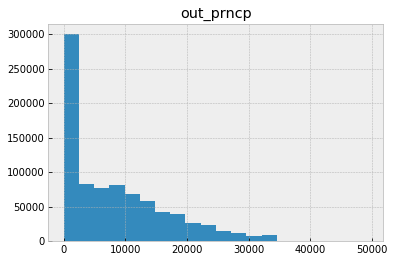

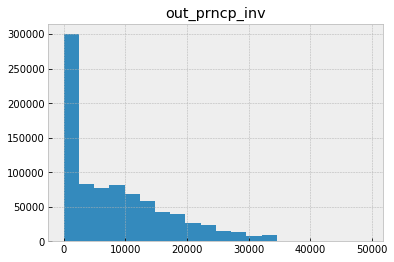

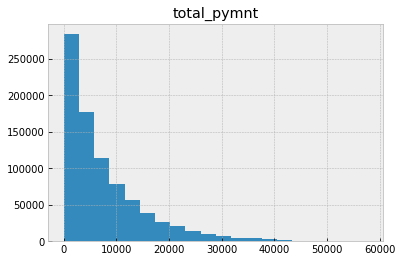

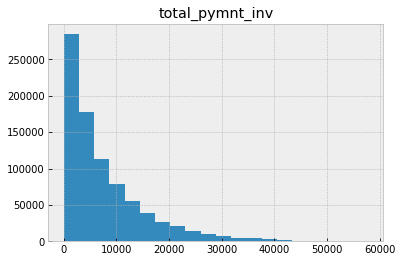

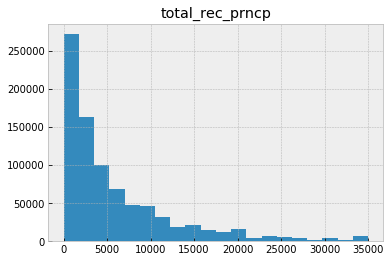

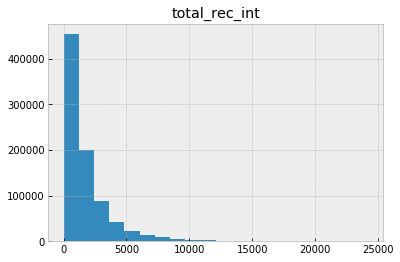

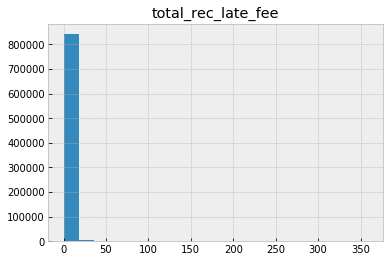

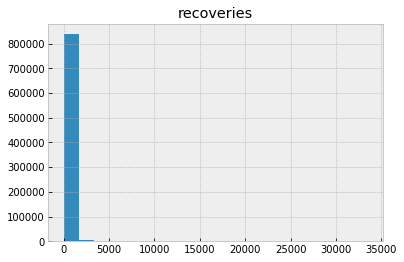

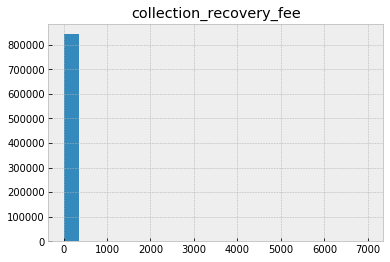

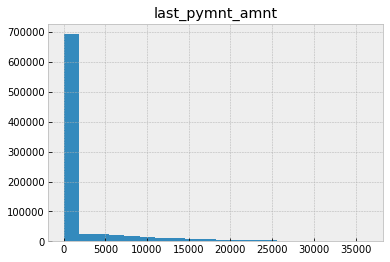

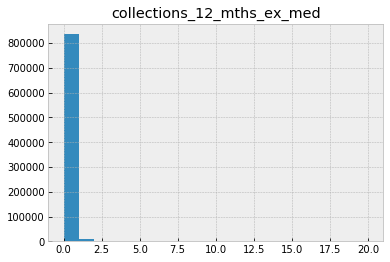

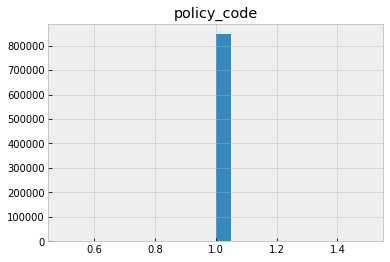

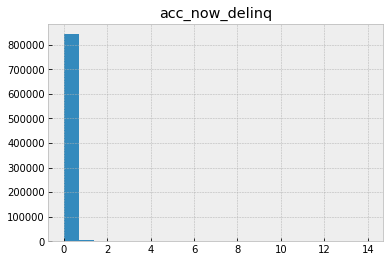

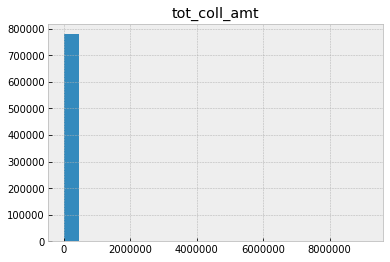

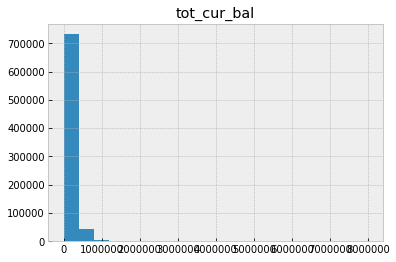

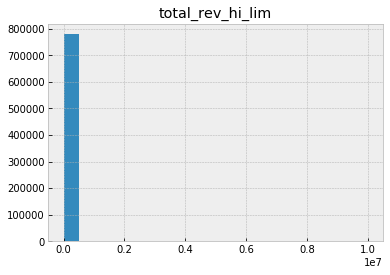

In [0]:
for i in data_num.columns:
    plt.hist(data_num[i],bins=20)
    plt.title(i)
    plt.show()
        

***Dropping Unique Numerical Columns***

In [0]:
data_num = data_num.drop(['acc_now_delinq', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'policy_code', 
                              'recoveries', 'total_rec_late_fee','id','member_id'],axis =1)

Trying To Remove Some redundant Features

In [0]:
data_num = data_num.drop(['funded_amnt','out_prncp_inv','total_pymnt'],axis = 1)

***Checking Outliers Using Boxplot***

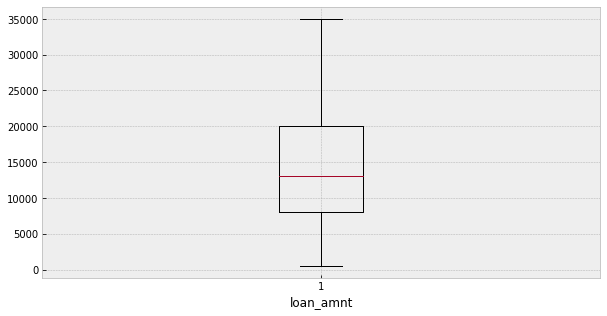

<Figure size 432x288 with 0 Axes>

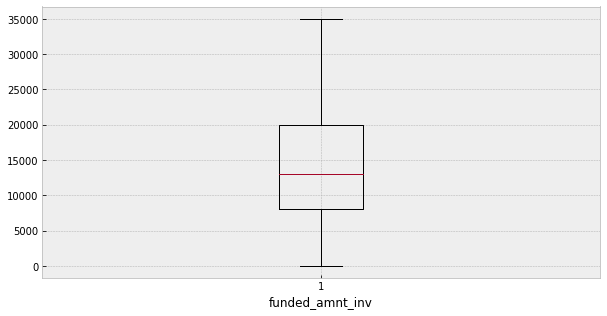

<Figure size 432x288 with 0 Axes>

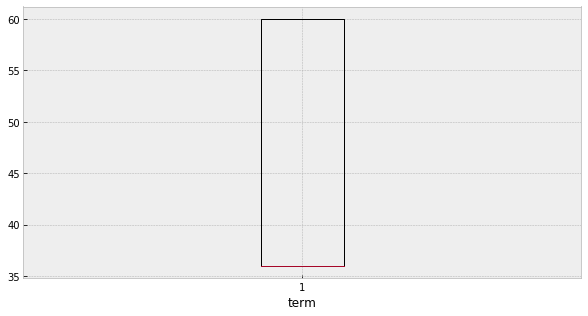

<Figure size 432x288 with 0 Axes>

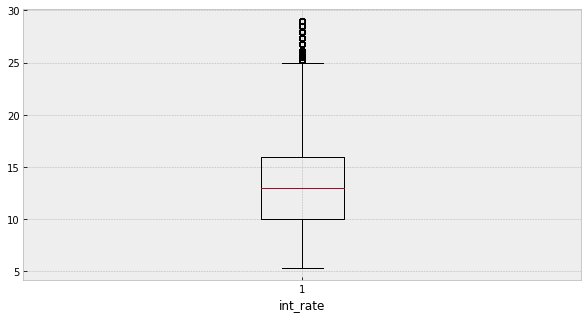

<Figure size 432x288 with 0 Axes>

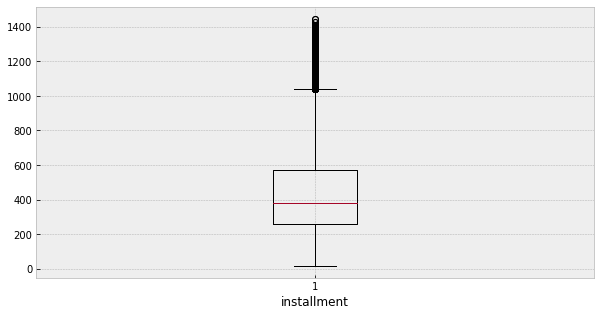

<Figure size 432x288 with 0 Axes>

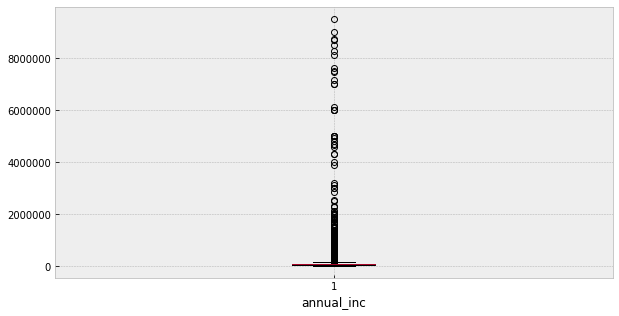

<Figure size 432x288 with 0 Axes>

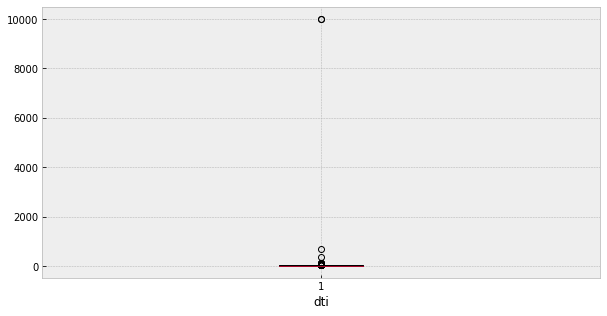

<Figure size 432x288 with 0 Axes>

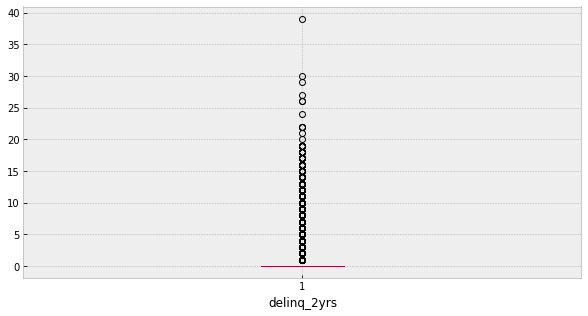

<Figure size 432x288 with 0 Axes>

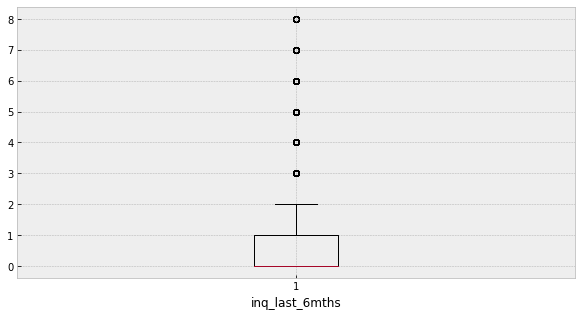

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<Figure size 432x288 with 0 Axes>

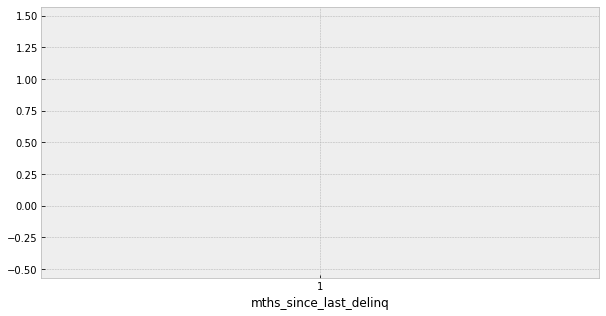

<Figure size 432x288 with 0 Axes>

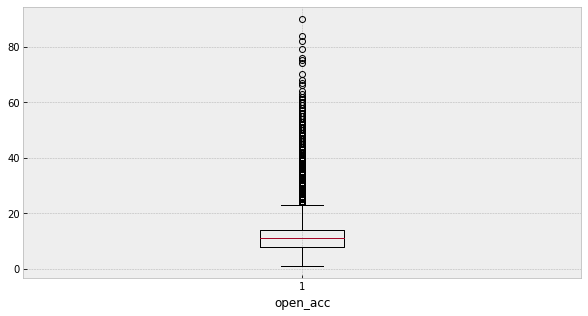

<Figure size 432x288 with 0 Axes>

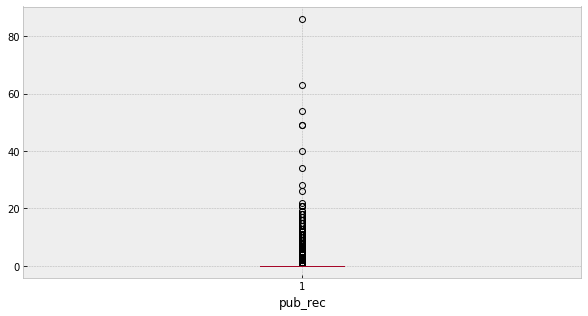

<Figure size 432x288 with 0 Axes>

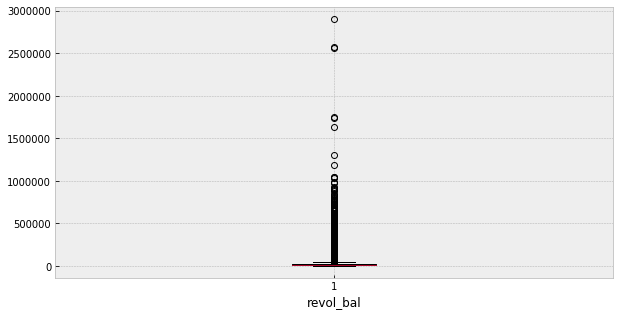

<Figure size 432x288 with 0 Axes>

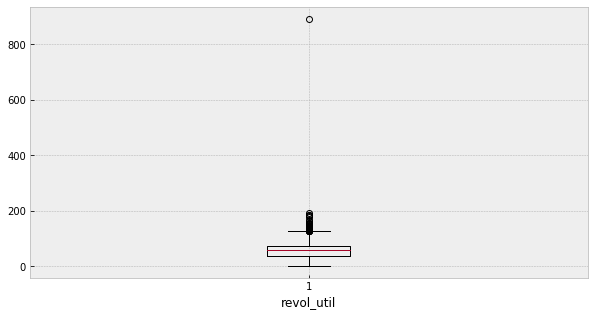

<Figure size 432x288 with 0 Axes>

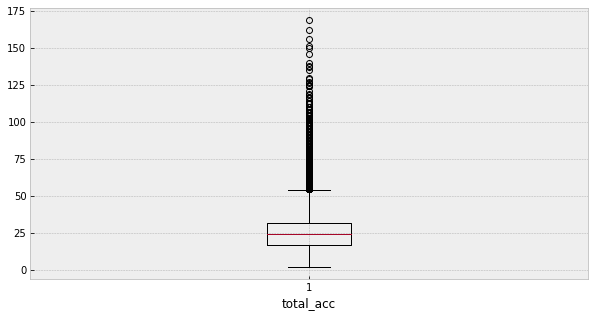

<Figure size 432x288 with 0 Axes>

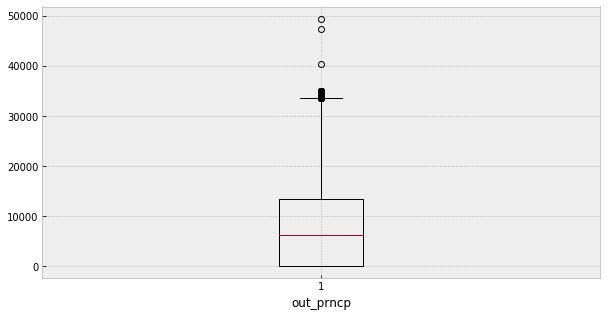

<Figure size 432x288 with 0 Axes>

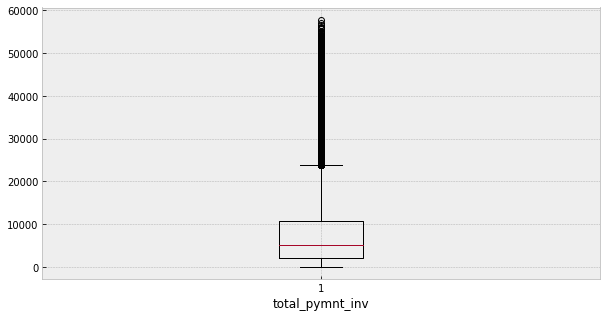

<Figure size 432x288 with 0 Axes>

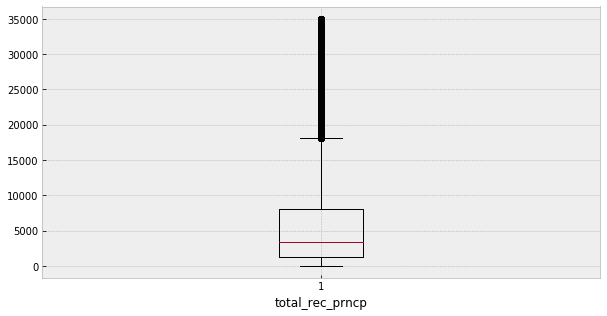

<Figure size 432x288 with 0 Axes>

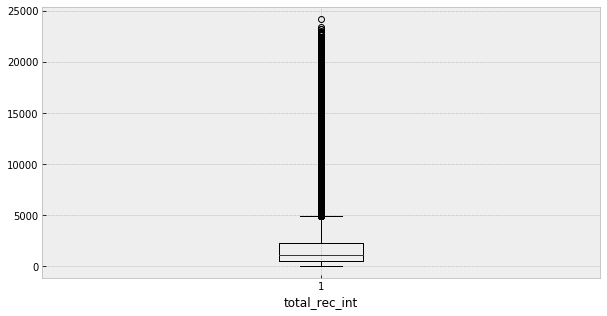

<Figure size 432x288 with 0 Axes>

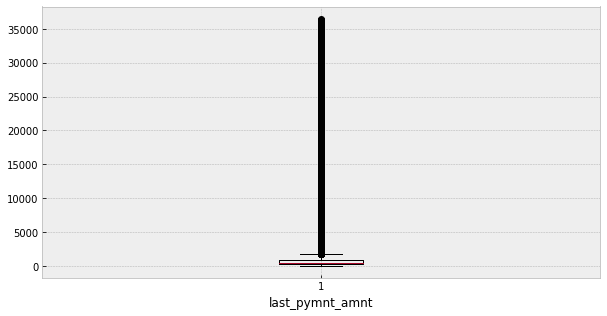

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<Figure size 432x288 with 0 Axes>

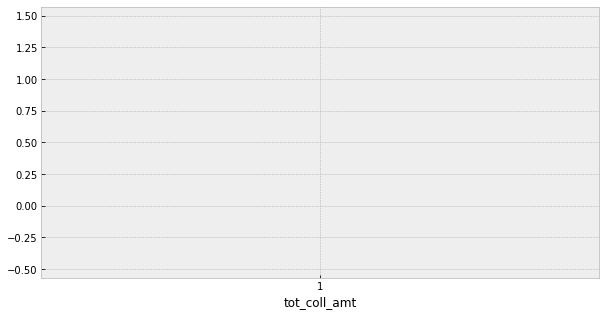

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<Figure size 432x288 with 0 Axes>

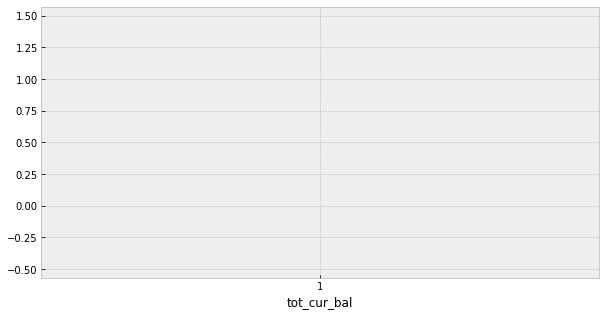

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<Figure size 432x288 with 0 Axes>

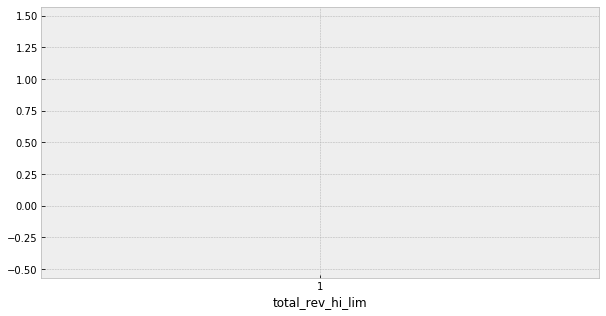

<Figure size 432x288 with 0 Axes>

In [0]:
for col in data_num.columns.values:
    plt.style.use('bmh')
    plt.figure(figsize=(10,5))
    plt.xlabel(col)
    plt.boxplot(data_num[col])
    plt.show()
    plt.tight_layout(h_pad=1.5)

***Imputation Of Null Values According To Mean,Medain,Mode***

In [0]:
# For the columns which are having categories greater than 20 we can at least find the category having highest 
# frequency using mode and it's percentage in that column
for col in data_cat.columns.values:
    if data_cat[col].nunique() > 2:
        mod = data_cat[col].mode()
        count = data_cat[col].value_counts().max()
        null=data_cat[col].isnull().sum()
        percent = count/len(data_cat)*100
        print("Column Name:",col,"\nMode:",mod,"\nCount:",count,"\nNull:",null,"\nIt's Representation in Percentage:",percent,"\n")

Column Name: grade 
Mode: 0    B
dtype: object 
Count: 245251 
Null: 0 
It's Representation in Percentage: 28.97098778557422 

Column Name: emp_length 
Mode: 0    10+ years
dtype: object 
Count: 279111 
Null: 42463 
It's Representation in Percentage: 32.97079878091998 

Column Name: home_ownership 
Mode: 0    MORTGAGE
dtype: object 
Count: 424652 
Null: 0 
It's Representation in Percentage: 50.16325277009946 

Column Name: verification_status 
Mode: 0    Source Verified
dtype: object 
Count: 314541 
Null: 0 
It's Representation in Percentage: 37.15607059323836 

Column Name: purpose 
Mode: 0    debt_consolidation
dtype: object 
Count: 500171 
Null: 0 
It's Representation in Percentage: 59.084154322300186 



In [0]:
# emp_length column is treated as object as it contains character string... extracting numbers from emp_length and filling na with
data_cat['emp_length'] = data_cat['emp_length'].str.extract('(\d+)')
data_cat['emp_length'] = data_cat['emp_length'].fillna(data_cat.emp_length.median())
data_cat.emp_length = data_cat.emp_length.astype("int64")

In [0]:
ls_max = []
for col in data_num.columns.values:
    count = data_num[col].value_counts().max()
    percent_count = data_num[col].value_counts().max()/len(data_num)*100
    mod = data_num[col].mode()
    null= data_num[col].isnull().sum()
    print("Max count Column name: ",col,"\nMode:",mod,"\nCount:",count,"\n Null:",null,"\nIt's representation in column in terms of %:",percent_count,"\n")
    if percent_count >= 95:
          ls_max.append(col)
      
        
print("The columns having same value more than 95% :",ls_max)

Max count Column name:  loan_amnt 
Mode: 0    10000.0
dtype: float64 
Count: 59180 
 Null: 0 
It's representation in column in terms of %: 6.990809648687598 

Max count Column name:  funded_amnt_inv 
Mode: 0    10000.0
dtype: float64 
Count: 53710 
 Null: 0 
It's representation in column in terms of %: 6.344649987005931 

Max count Column name:  term 
Mode: 0    36
dtype: int64 
Count: 593708 
 Null: 0 
It's representation in column in terms of %: 70.13348453705672 

Max count Column name:  int_rate 
Mode: 0    10.99
dtype: float64 
Count: 34035 
 Null: 0 
It's representation in column in terms of %: 4.020483379403218 

Max count Column name:  installment 
Mode: 0    327.34
dtype: float64 
Count: 2547 
 Null: 0 
It's representation in column in terms of %: 0.3008717839676802 

Max count Column name:  annual_inc 
Mode: 0    60000.0
dtype: float64 
Count: 32650 
 Null: 0 
It's representation in column in terms of %: 3.856876225577055 

Max count Column name:  dti 
Mode: 0    19.2
dtype: 

In [0]:
data_num.mths_since_last_delinq = data_num.mths_since_last_delinq.fillna(data_num.mths_since_last_delinq.median())

In [0]:
data_num.tot_coll_amt = data_num.tot_coll_amt.fillna(0.0)


In [0]:
data_num.tot_cur_bal=data_num.tot_cur_bal.fillna(data_num.tot_cur_bal.median())

In [0]:
data_num.total_rev_hi_lim = data_num.total_rev_hi_lim.fillna(23800.0)

***Feature Selection***

***Correlation Matrix***

In [0]:
data_num.corr()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.997622,0.410881,0.143129,0.944867,0.336387,0.020200,-0.000387,-0.029047,-0.029071,0.198805,-0.082611,0.337412,0.119706,0.222117,0.637872,0.485521,0.399886,0.542835,0.235214,-0.003516,0.324563,0.304687
funded_amnt_inv,0.997622,1.000000,0.410251,0.143546,0.944193,0.335543,0.021477,0.000396,-0.030556,-0.028186,0.199928,-0.081429,0.336790,0.120978,0.222283,0.642086,0.483761,0.395009,0.539764,0.233637,-0.003418,0.326136,0.305574
term,0.410881,0.410251,1.000000,0.427713,0.143527,0.059093,0.049971,-0.000217,-0.001572,-0.006498,0.085727,-0.025342,0.093381,0.086092,0.101410,0.391898,0.086220,-0.023820,0.387706,0.074507,-0.001975,0.110700,0.064369
int_rate,0.143129,0.143546,0.427713,1.000000,0.130533,-0.073729,0.078279,0.055566,0.231552,-0.012417,-0.010143,0.052822,-0.034833,0.272358,-0.039016,0.035002,0.174685,0.058537,0.449275,0.107329,0.001363,-0.082516,-0.155778
installment,0.944867,0.944193,0.143527,0.130533,1.000000,0.329784,0.013975,0.007552,0.001623,-0.030122,0.183958,-0.071465,0.319949,0.131989,0.200034,0.537556,0.526480,0.459607,0.506508,0.244697,-0.002831,0.294576,0.280240
annual_inc,0.336387,0.335543,0.059093,-0.073729,0.329784,1.000000,-0.086685,0.048202,0.037777,-0.031793,0.140182,-0.009007,0.299266,0.036578,0.189546,0.211301,0.165925,0.154571,0.132429,0.093675,0.001124,0.411417,0.264457
dti,0.020200,0.021477,0.049971,0.078279,0.013975,-0.086685,1.000000,-0.002823,-0.005812,-0.000716,0.141693,-0.022675,0.066902,0.086515,0.105927,0.057862,-0.039066,-0.050476,0.009547,-0.028332,-0.001591,-0.000381,0.035834
delinq_2yrs,-0.000387,0.000396,-0.000217,0.055566,0.007552,0.048202,-0.002823,1.000000,0.023063,-0.476251,0.052005,-0.010855,-0.031766,-0.016132,0.122243,0.031381,-0.031327,-0.038102,0.001656,-0.018732,0.000523,0.069314,-0.036224
inq_last_6mths,-0.029047,-0.030556,-0.001572,0.231552,0.001623,0.037777,-0.005812,0.023063,1.000000,0.016314,0.116437,0.059432,-0.018844,-0.088349,0.141951,-0.104471,0.079783,0.065127,0.088850,0.065608,0.002694,0.028046,0.002610
mths_since_last_delinq,-0.029071,-0.028186,-0.006498,-0.012417,-0.030122,-0.031793,-0.000716,-0.476251,0.016314,1.000000,-0.026728,0.076213,-0.025813,0.006060,-0.014111,-0.022774,-0.009910,-0.005922,-0.021234,0.002065,0.007259,-0.061370,-0.028612


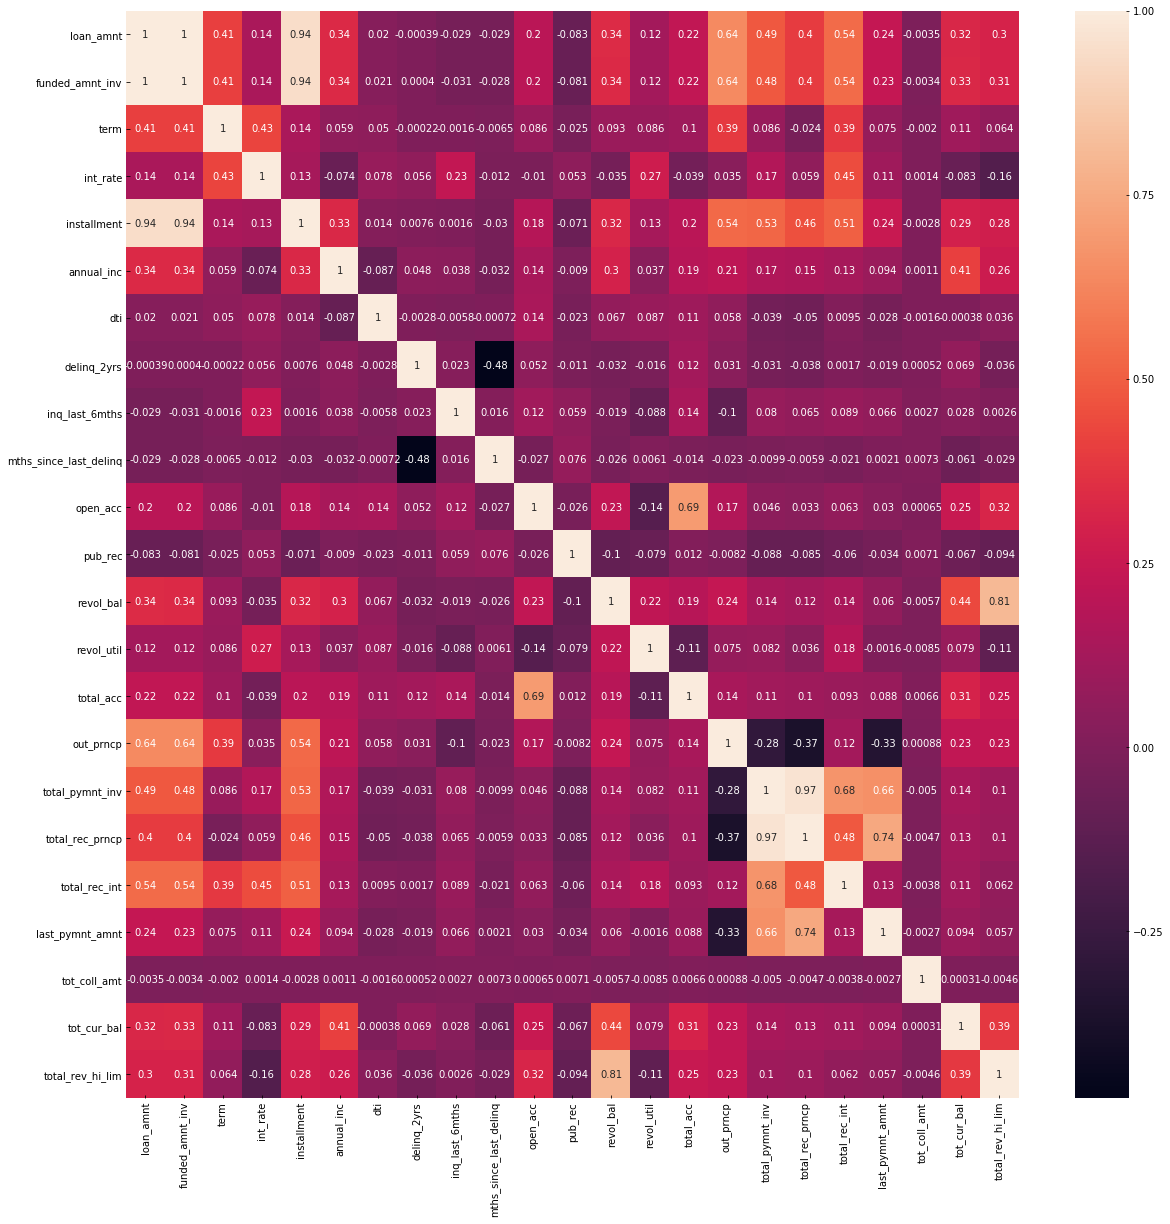

In [0]:
plt.figure(figsize=(20,20))
corr_df=data_num.corr()
sns.heatmap(corr_df,xticklabels=corr_df.columns.values,yticklabels=corr_df.columns.values,annot=True)

In [0]:
data_num.shape

(846540, 23)

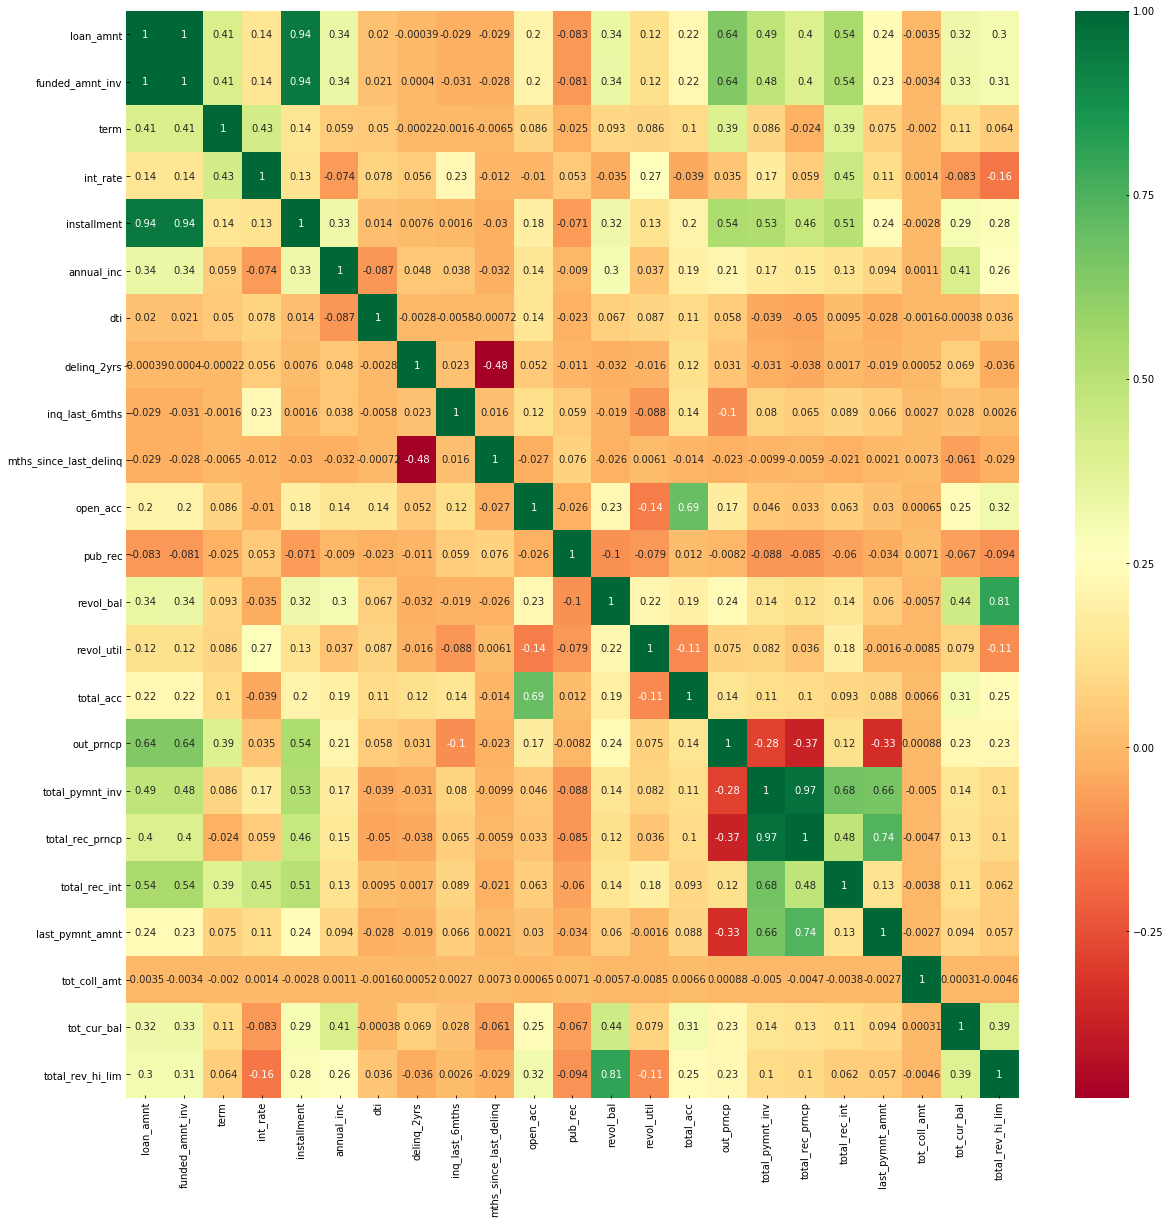

In [0]:
X1 = data_num.iloc[:,0:23]  #independent columns
y1 = data['default_ind']    #target column i.e price range
#get correlations of each features in dataset
corrmat = data_num.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_num[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
data_cat = data_cat.reindex(sorted(data_cat.columns),axis =1)

In [0]:
target = data_cat.iloc[:,2]
cat_check = data_cat.drop("default_ind",axis = 1)

***Chi-Squared Test***

In [0]:
from scipy.stats import chi2_contingency

In [0]:
def chi2(col):
  table = pd.crosstab(target,cat_check[col])
  chi2, p, dof, expected = chi2_contingency(table.values)
  print("Column Name:",col,"=""Chi2 value:{} and p_value:{}".format(chi2,p),"\n")

In [0]:
ls=list(map(chi2,list(cat_check.columns)))

Column Name: emp_length =Chi2 value:233.5064188171323 and p_value:3.5169879881456206e-24 

Column Name: grade =Chi2 value:5079240.0 and p_value:0.0 

Column Name: home_ownership =Chi2 value:4787.612543991279 and p_value:0.0 

Column Name: initial_list_status =Chi2 value:7447.541130146597 and p_value:0.0 

Column Name: purpose =Chi2 value:45552.19429070855 and p_value:0.0 

Column Name: verification_status =Chi2 value:46372.23893653651 and p_value:0.0 



***Using Label Encoder To Convert Data Type***

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in range(0,len(data_cat.columns)):
    data_cat.iloc[:,col] = le.fit_transform(data_cat.iloc[:,col])
    

In [0]:
data_new=pd.concat([data_num,data_cat,date_feat],axis=1)
data_new.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,emp_length,grade,home_ownership,initial_list_status,purpose,verification_status,new_var1,new_var2
0,5000.0,4975.0,36,10.65,162.87,24000.0,27.65,0.0,1.0,31.0,3.0,0.0,13648.0,83.7,9.0,0.0,5831.78,5000.00,861.07,171.62,0.0,81024.5,23800.0,0,9,1,5,0,1,2,1492,365
1,2500.0,2500.0,60,15.27,59.83,30000.0,1.00,0.0,5.0,31.0,3.0,0.0,1687.0,9.4,4.0,0.0,1008.71,456.46,435.17,119.66,0.0,81024.5,23800.0,1,0,2,5,0,0,1,640,153
2,2400.0,2400.0,36,15.96,84.33,12252.0,8.72,0.0,2.0,31.0,2.0,0.0,2956.0,98.5,10.0,0.0,3003.65,2400.00,603.65,649.91,0.0,81024.5,23800.0,0,9,2,5,0,11,0,1492,579
3,10000.0,10000.0,36,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,0.0,12226.30,10000.00,2209.33,357.48,0.0,81024.5,23800.0,0,9,2,5,0,9,1,1127,0
4,3000.0,3000.0,60,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,766.9,3242.17,2233.10,1009.07,67.79,0.0,81024.5,23800.0,0,0,1,5,0,9,1,1492,0


In [0]:
data_new.shape

(846540, 32)

In [0]:
data_new = data_new.reindex(sorted(data_new.columns),axis =1)
data_new.head()

,annual_inc,default_ind,delinq_2yrs,dti,emp_length,funded_amnt_inv,grade,home_ownership,initial_list_status,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,mths_since_last_delinq,new_var1,new_var2,open_acc,out_prncp,pub_rec,purpose,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim,verification_status
0,24000.0,0,0.0,27.65,9,4975.0,1,5,0,1.0,162.87,10.65,171.62,5000.0,31.0,1492,365,3.0,0.0,0.0,1,13648.0,83.7,36,0.0,81024.5,9.0,5831.78,861.07,5000.00,23800.0,2
1,30000.0,1,0.0,1.00,0,2500.0,2,5,0,5.0,59.83,15.27,119.66,2500.0,31.0,640,153,3.0,0.0,0.0,0,1687.0,9.4,60,0.0,81024.5,4.0,1008.71,435.17,456.46,23800.0,1
2,12252.0,0,0.0,8.72,9,2400.0,2,5,0,2.0,84.33,15.96,649.91,2400.0,31.0,1492,579,2.0,0.0,0.0,11,2956.0,98.5,36,0.0,81024.5,10.0,3003.65,603.65,2400.00,23800.0,0
3,49200.0,0,0.0,20.00,9,10000.0,2,5,0,1.0,339.31,13.49,357.48,10000.0,35.0,1127,0,10.0,0.0,0.0,9,5598.0,21.0,36,0.0,81024.5,37.0,12226.30,2209.33,10000.00,23800.0,1
4,80000.0,0,0.0,17.94,0,3000.0,1,5,0,0.0,67.79,12.69,67.79,3000.0,38.0,1492,0,15.0,766.9,0.0,9,27783.0,53.9,60,0.0,81024.5,38.0,3242.17,1009.07,2233.10,23800.0,1


In [0]:
data_new = data_new.drop(['new_var1','new_var2'],axis=1)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data_new.drop(['default_ind'],axis=1)  #independent columns
y = data_new.iloc[:,1]   #target column 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

               Specs         Score
15         out_prncp  3.698371e+08
22       tot_cur_bal  2.788422e+08
11   last_pymnt_amnt  6.900480e+07
0         annual_inc  6.329059e+07
26   total_rec_prncp  5.285371e+07
27  total_rev_hi_lim  4.890391e+07
24   total_pymnt_inv  1.129010e+07
18         revol_bal  1.008806e+07
25     total_rec_int  4.552102e+06
21      tot_coll_amt  2.503002e+06


[0.0081527  0.00378506 0.00878918 0.00702093 0.0663624  0.01465092
 0.00405955 0.00842444 0.00721131 0.06403248 0.027737   0.06081911
 0.0651698  0.00655899 0.00781805 0.31493801 0.00354179 0.00774039
 0.00823866 0.00885248 0.01725247 0.0031149  0.0087215  0.00790125
 0.0801956  0.02465064 0.13943066 0.00842517 0.00640458]


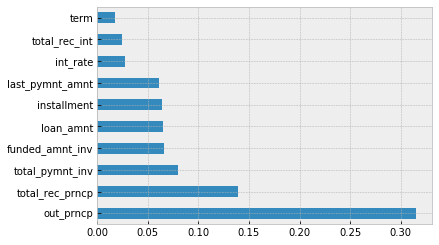

In [0]:
X = data_new.drop(['default_ind'],axis=1)  #independent columns
y = data_new.iloc[:,1]    #target column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
data_y=data_new.iloc[:,1]
data_y.head()

0    0
1    1
2    0
3    0
4    0
Name: default_ind, dtype: int64

In [0]:
data_x=data_new.drop(['default_ind'],axis=1)
data_x.head()

,annual_inc,delinq_2yrs,dti,emp_length,funded_amnt_inv,grade,home_ownership,initial_list_status,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,mths_since_last_delinq,open_acc,out_prncp,pub_rec,purpose,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim,verification_status
0,24000.0,0.0,27.65,9,4975.0,1,5,0,1.0,162.87,10.65,171.62,5000.0,31.0,3.0,0.0,0.0,1,13648.0,83.7,36,0.0,81024.5,9.0,5831.78,861.07,5000.00,23800.0,2
1,30000.0,0.0,1.00,0,2500.0,2,5,0,5.0,59.83,15.27,119.66,2500.0,31.0,3.0,0.0,0.0,0,1687.0,9.4,60,0.0,81024.5,4.0,1008.71,435.17,456.46,23800.0,1
2,12252.0,0.0,8.72,9,2400.0,2,5,0,2.0,84.33,15.96,649.91,2400.0,31.0,2.0,0.0,0.0,11,2956.0,98.5,36,0.0,81024.5,10.0,3003.65,603.65,2400.00,23800.0,0
3,49200.0,0.0,20.00,9,10000.0,2,5,0,1.0,339.31,13.49,357.48,10000.0,35.0,10.0,0.0,0.0,9,5598.0,21.0,36,0.0,81024.5,37.0,12226.30,2209.33,10000.00,23800.0,1
4,80000.0,0.0,17.94,0,3000.0,1,5,0,0.0,67.79,12.69,67.79,3000.0,38.0,15.0,766.9,0.0,9,27783.0,53.9,60,0.0,81024.5,38.0,3242.17,1009.07,2233.10,23800.0,1


In [0]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [0]:
dt.fit(data_x,data_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

***Checking Feature Importance***

In [0]:
importance=dt.feature_importances_

In [0]:
imp_features = pd.DataFrame({"Features":data_x.columns,"Importance":importance})

In [0]:
imp_features.sort_values('Importance',ascending=False)

,Features,Importance
26,total_rec_prncp,0.485044
12,loan_amnt,0.193426
15,out_prncp,0.126951
4,funded_amnt_inv,0.104502
11,last_pymnt_amnt,0.058690
9,installment,0.006127
25,total_rec_int,0.002728
22,tot_cur_bal,0.002300
2,dti,0.002285
18,revol_bal,0.002271


In [0]:
data_new.columns

Index(['annual_inc', 'default_ind', 'delinq_2yrs', 'dti', 'emp_length',
       'funded_amnt_inv', 'grade', 'home_ownership', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'last_pymnt_amnt',
       'loan_amnt', 'mths_since_last_delinq', 'open_acc', 'out_prncp',
       'pub_rec', 'purpose', 'revol_bal', 'revol_util', 'term', 'tot_coll_amt',
       'tot_cur_bal', 'total_acc', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_prncp', 'total_rev_hi_lim', 'verification_status'],
      dtype='object')

In [0]:
df_x=data_new.iloc[:,[0,3,10,14,21,8,17,3,28,16,6,5,7,20,17,2,9,11,29]]
df_x.head()
df_y=data_new.iloc[:,1]
df_x.head()

,annual_inc,dti,installment,mths_since_last_delinq,term,initial_list_status,pub_rec,dti,total_rev_hi_lim,out_prncp,grade,funded_amnt_inv,home_ownership,revol_util,pub_rec,delinq_2yrs,inq_last_6mths,int_rate,verification_status
0,24000.0,27.65,162.87,31.0,36,0,0.0,27.65,23800.0,0.0,1,4975.0,5,83.7,0.0,0.0,1.0,10.65,2
1,30000.0,1.00,59.83,31.0,60,0,0.0,1.00,23800.0,0.0,2,2500.0,5,9.4,0.0,0.0,5.0,15.27,1
2,12252.0,8.72,84.33,31.0,36,0,0.0,8.72,23800.0,0.0,2,2400.0,5,98.5,0.0,0.0,2.0,15.96,0
3,49200.0,20.00,339.31,35.0,36,0,0.0,20.00,23800.0,0.0,2,10000.0,5,21.0,0.0,0.0,1.0,13.49,1
4,80000.0,17.94,67.79,38.0,60,0,0.0,17.94,23800.0,766.9,1,3000.0,5,53.9,0.0,0.0,0.0,12.69,1


In [0]:

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (592578, 19)
Number transactions y_train dataset:  (592578,)
Number transactions X_test dataset:  (253962, 19)
Number transactions y_test dataset:  (253962,)


In [0]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=4)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 32068
Before OverSampling, counts of label '0': 560510 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (1121020, 19)
After OverSampling, the shape of train_y: (1121020,) 

After OverSampling, counts of label '1': 560510
After OverSampling, counts of label '0': 560510


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [0]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred=lr1.predict(X_test)

pred2=lr1.predict_proba(X_test)
pred_prob_df=pd.DataFrame(pred2)
pred_prob_df.head()

,0,1
0,0.246234,0.753766
1,0.135088,0.864912
2,0.988552,0.011448
3,0.990864,0.009136
4,0.782160,0.217840


In [0]:
from sklearn.metrics import confusion_matrix
tab=confusion_matrix(pred,y_test)
tab

array([[173414,    590],
       [ 66741,  13217]])

In [0]:
fpr=(13217)/(66741+13217)
fpr

0.16529928212311462

In [0]:
tpr=(66741)/(66741+13217)
tpr

0.8347007178768854

In [0]:
accuracy=tab.diagonal().sum()/tab.sum()
accuracy

0.7348776588623495

In [0]:
from sklearn import metrics
auc_score = metrics.roc_auc_score( y_test,pred )
round( float( auc_score ), 2)

0.84

In [0]:
import matplotlib.pyplot as plt


In [0]:
f1_score=(2*173414)/((2*173414)+66741+590)

In [0]:
f1_score

0.8374271716900997

In [0]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84    174004
           1       0.96      0.17      0.28     79958

    accuracy                           0.73    253962
   macro avg       0.84      0.58      0.56    253962
weighted avg       0.80      0.73      0.66    253962



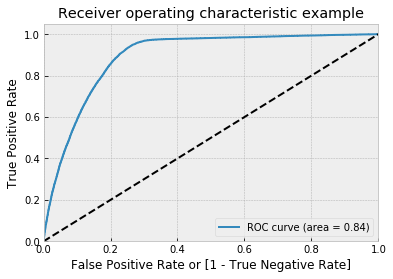

In [0]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_df.iloc[:,1],drop_intermediate=False )
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting= GradientBoostingClassifier(max_depth= 4, n_estimators=50, max_features = 0.3)
GradientBoosting.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[("GB",GradientBoosting),("logistic",lr1)],voting='hard')

vc.fit(X_train_res, y_train_res)

y_pred = vc.predict(X_test)

conf_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
conf_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Predicted,0,1
True,,
0,222055,18100
1,6673,7134


In [0]:
accuracy=(222055+7134)/(222055+7134+6673+18100)
accuracy

0.9024539104275443

In [0]:
tpr=7134/(7134+6673)
tpr

0.5166944303614108

In [0]:
fpr=6673/(7134+6673)
fpr

0.4833055696385891